<a href="https://colab.research.google.com/github/Farivini/Extracting-Statistics-in-PySpark/blob/main/Analises_descritivas_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=4195555fddd80141ef96fe20ad2040b3cc20ac8cb185bea0eb7b91cfdd4cfe5e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

{}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Baixar o dataset do Kaggle
!kaggle datasets download -d camnugent/sandp500
!unzip sandp500.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/camnugent/sandp500
License(s): CC0-1.0
 26% 5.00M/19.3M [00:00<00:00, 44.6MB/s]
100% 19.3M/19.3M [00:00<00:00, 108MB/s] 
Archive:  sandp500.zip
  inflating: all_stocks_5yr.csv      
  inflating: getSandP.py             
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv  
  inflating: individual_stocks_5yr/individual_stocks_5yr/.DS_Store  
  inflating: individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv  
  inflating: individual_stocks_5yr/individual_stoc

In [63]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import length, col, countDistinct



In [ ]:
spark= SparkSession.builder.master("local[*]").getOrCreate()

In [7]:
df = spark.read.csv("/content/all_stocks_5yr.csv", header=True)

In [8]:
df.show()

+----------+-----+-----+-----+-----+--------+----+
|      date| open| high|  low|close|  volume|Name|
+----------+-----+-----+-----+-----+--------+----+
|2013-02-08|15.07|15.12|14.63|14.75| 8407500| AAL|
|2013-02-11|14.89|15.01|14.26|14.46| 8882000| AAL|
|2013-02-12|14.45|14.51| 14.1|14.27| 8126000| AAL|
|2013-02-13| 14.3|14.94|14.25|14.66|10259500| AAL|
|2013-02-14|14.94|14.96|13.16|13.99|31879900| AAL|
|2013-02-15|13.93|14.61|13.93| 14.5|15628000| AAL|
|2013-02-19|14.33|14.56|14.08|14.26|11354400| AAL|
|2013-02-20|14.17|14.26|13.15|13.33|14725200| AAL|
|2013-02-21|13.62|13.95| 12.9|13.37|11922100| AAL|
|2013-02-22|13.57| 13.6|13.21|13.57| 6071400| AAL|
|2013-02-25| 13.6|13.76| 13.0|13.02| 7186400| AAL|
|2013-02-26|13.14|13.42| 12.7|13.26| 9419000| AAL|
|2013-02-27|13.28|13.62|13.18|13.41| 7390500| AAL|
|2013-02-28|13.49|13.63|13.39|13.43| 6143600| AAL|
|2013-03-01|13.37|13.95|13.32|13.61| 7376800| AAL|
|2013-03-04| 13.5|14.07|13.47| 13.9| 8174800| AAL|
|2013-03-05|14.01|14.05|13.71|1

### Descrição sobre o dataset

In [9]:
df.describe().show()

+-------+----------+-----------------+-----------------+-----------------+-----------------+-----------------+------+
|summary|      date|             open|             high|              low|            close|           volume|  Name|
+-------+----------+-----------------+-----------------+-----------------+-----------------+-----------------+------+
|  count|    619040|           619029|           619032|           619032|           619040|           619040|619040|
|   mean|      NULL|83.02333431454696|83.77831069346465|82.25609641375786|83.04376276476573|4321823.395568945|  NULL|
| stddev|      NULL| 97.3787690433231|  98.207518904464| 96.5074210580914|97.38974800165752|8693609.511967659|  NULL|
|    min|2013-02-08|             1.62|             1.69|              1.5|             1.59|                0|     A|
|    max|2018-02-07|           999.47|           999.75|           999.48|            999.6|           999994|   ZTS|
+-------+----------+-----------------+-----------------+

### Registro sobre a apple

In [13]:
aapl = df.filter(df.Name == "AAPL")
aapl_cont = aapl.count()
print(aapl_cont)

1259


### Empresas distintas

In [14]:
empresas_distintas = df.select("Name").distinct().count()
print(empresas_distintas)

505


### Frequencia com que o preço de uma ação no fechamento é maior que o preço na abertura

In [19]:
# filtro para fechamentos maior
fechamento_maior_abertura = df.filter(df.close > df.open)
contagem_maior_abertura = fechamento_maior_abertura.count()
total = df.count()
frequencia_maior_abertura = contagem_maior_abertura / total
print(frequencia_maior_abertura*100)

51.52171103644353


### Qual o maior valor das ações da Apple (AAPL) na Historia ?

In [21]:
aapl_max = aapl.agg({"High": "max"}).collect()[0][0]
print(aapl_max)

99.99


In [68]:
apple_maximo = df.filter(df.Name == "AAPL")
apple_maximo.describe().show()

+-------+----------+------------------+------------------+------------------+------------------+-------------------+----+
|summary|      date|              open|              high|               low|             close|             volume|Name|
+-------+----------+------------------+------------------+------------------+------------------+-------------------+----+
|  count|      1259|              1259|              1259|              1259|              1259|               1259|1259|
|   mean|      NULL|109.05542891183475|109.95111834789516|108.14158888006372|109.06669849086583|5.404789973550437E7|NULL|
| stddev|      NULL| 30.54922002458826|30.686186407983914|30.376223585852472|30.556811676964696|  3.3468353335784E7|NULL|
|    min|2013-02-08|             100.0|             100.0|            100.11|            100.11|          100091990|AAPL|
|    max|2018-02-07|             99.95|             99.99|             99.95|             99.99|           99756489|AAPL|
+-------+----------+----

### Qual ação tem a maior volatilidade?

## Vamos calcular o desvio padrão e depois ordenar e pegar o nome e a maior volatilidade

---



In [24]:
from pyspark.sql.functions import stddev, col

# Calcular o desvio padrão do preço de fechamento para cada ação
volatilidade = df.groupBy('Name').agg(stddev('Close').alias('Volatility'))
# Ordenar as ações pela maior volatilidade
ordena_volatilidade = volatilidade.orderBy(col('Volatility').desc()).first()

# Mostrar a ação com a maior volatilidade e o valor da volatilidade
print(f"A ação com a maior volatilidade é {ordena_volatilidade['Name']} com uma volatilidade de {ordena_volatilidade['Volatility']:.2f}")


A ação com a maior volatilidade é PCLN com uma volatilidade de 320.53


### Qual dia com maior volume total de negociação da bolsa

In [26]:
maior_dia = df.groupBy('date').agg({'volume': 'sum'}).orderBy(col('sum(volume)').desc()).first()
maior_dia

Row(date='2015-08-24', sum(volume)=4607945196.0)

### Qual a ação mais negociada da bolsa , em volume

In [27]:
maior_acao = df.groupBy('Name').agg({'volume': 'sum'}).orderBy(col('sum(volume)').desc()).first()
maior_acao

Row(Name='BAC', sum(volume)=117884953591.0)

#### Quantas ações começam com a letra A

In [65]:
start_a = df.filter(df.Name.startswith('A')).distinct().count()
start_a

72870

### Com qual frequencia o preço mais alto do dia da ação tambem é o preço de fechamento?

In [34]:
freq_maior_preco_fechamento = df.filter(df.high == df.close).count()
print(f"Quantidade de fechamentos que é igual ao fechamento:{freq_maior_preco_fechamento} " )

percentual_maior_preco_fechamento = (freq_maior_preco_fechamento / df.count()) * 100
print(f"Percentual de fechamentos que é igual ao fechamento:{percentual_maior_preco_fechamento:.2f}%")

Quantidade de fechamentos que é igual ao fechamento:7420 
Percentual de fechamentos que é igual ao fechamento:1.20%


### Em qual dia a ação da Apple mais subiu entre a abertura e o fechamento, de forma absoluta e seu grafico.

In [36]:
maior_dia_apple = df.filter(df.Name == 'AAPL').withColumn('Diferenca', df.close - df.open).orderBy(col('Diferenca').desc()).first()
maior_dia_apple

Row(date='2015-08-24', open='94.87', high='108.8', low='92.0', close='103.12', volume='162206292', Name='AAPL', Diferenca=8.25)

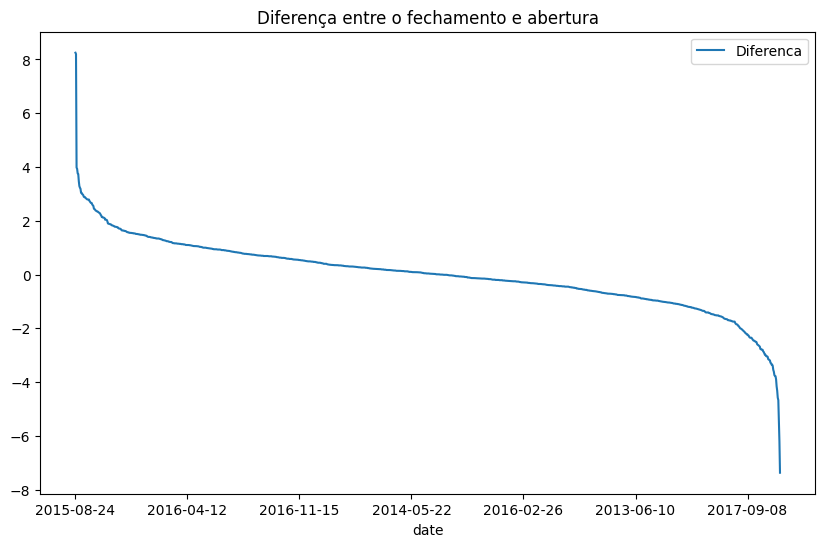

In [43]:
grafico_maior_dia_apple = df.filter(df.Name == 'AAPL').withColumn('Diferenca', df.close - df.open).orderBy(col('Diferenca').desc())

grafico_de_linha = grafico_maior_dia_apple.toPandas()
grafico_de_dispeção = grafico_de_linha.plot(x='date', y='Diferenca', kind='line', title='Diferença entre o fechamento e abertura', figsize=(10, 6))

### Qual a media de volume da APPLE?

In [44]:
media_apple = df.filter(df.Name == 'AAPL').agg({'volume': 'avg'}).collect()[0][0]
media_apple

54047899.73550437

##### Quais ações tem 1,2,3,4,e 5 caracteres em seu nome respectivamente?

+-----------+-------------------+
|name_length|distinct_name_count|
+-----------+-------------------+
|          1|                 10|
|          3|                323|
|          5|                  5|
|          4|                117|
|          2|                 50|
+-----------+-------------------+



<Axes: title={'center': 'Contagem de Nomes Distintos por Comprimento'}, xlabel='name_length'>

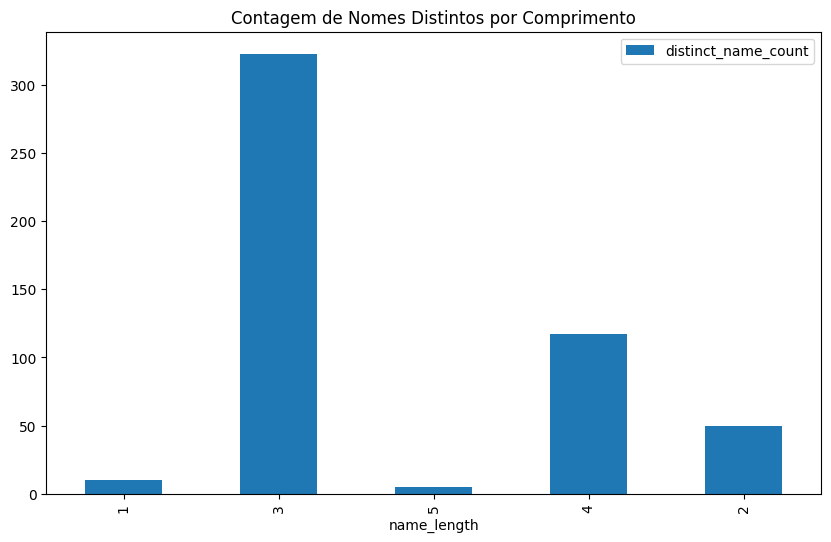

In [60]:




# Criar uma nova coluna com o comprimento dos nomes das ações
df_with_length = df.withColumn('name_length', length(col('Name')))

# Agrupar pelo comprimento dos nomes e contar o número de nomes distintos para cada comprimento
contar_nomes_distintos = df_with_length.groupBy('name_length').agg(countDistinct('Name').alias('distinct_name_count'))

# Mostrar o resultado
contar_nomes_distintos.show()

grafico_histograma = contar_nomes_distintos.toPandas()
grafico_histograma.plot(x='name_length', y='distinct_name_count', kind='bar', title='Contagem de Nomes Distintos por Comprimento', figsize=(10, 6))

### Qual a ação da bolsa menos negociada da bolsa, em volume de transações?

In [61]:
acao_menos_negociada = df.groupBy('Name').agg({'volume': 'sum'}).orderBy(col('sum(volume)').asc()).first()
acao_menos_negociada

Row(Name='APTV', sum(volume)=92947779.0)